In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
USA_Housing = pd.read_csv(
    "USA_Housing.csv",
    encoding="latin1",
    on_bad_lines="skip",
    engine="python"
)
USA_Housing.head(10)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674 \nLaurabury, NE 370..."
1,79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,USS Barnett\nFPO AP 44820
4,59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402,USNS Raymond\nFPO AE 09386
5,80175.7541594853,4.9884077575337145,6.104512439428879,4.04,26748.428424689715,1068138.0743935304,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46342788773,6.025335906887153,8.147759585023431,3.41,60828.24908540716,1502055.8173744078,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33927753085,6.9897797477182815,6.620477995185026,2.42,36516.358972493836,1573936.5644777215,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081334963,5.36212556960358,6.3931209805509015,2.3,29387.39600281585,798869.5328331633,USS Gilbert\nFPO AA 20957
9,81885.92718409566,4.423671789897876,8.167688003472351,6.1,40149.96574921337,1545154.8126419624,Unit 9446 Box 0958\nDPO AE 97025


In [128]:
# Extract line 2
USA_Housing['address_line2'] = USA_Housing['Address'].str.split('\n').str[-1]
USA_Housing[['city', 'state', 'zip']] = USA_Housing['address_line2'].str.extract(
    r'^(.*?),\s*([A-Z]{2})\s+(\d{5}(?:-\d{4})?)$'
)


In [129]:
USA_Housing.head(20)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,address_line2,city,state,zip
0,79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674 \nLaurabury, NE 370...","Laurabury, NE 37010-5101",Laurabury,NE,37010-5101
1,79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA...","Lake Kathleen, CA 48958",Lake Kathleen,CA,48958
2,61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...","Danieltown, WI 06482-3489",Danieltown,WI,06482-3489
3,63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,USS Barnett\nFPO AP 44820,FPO AP 44820,NaN,NaN,NaN
4,59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402,USNS Raymond\nFPO AE 09386,FPO AE 09386,NaN,NaN,NaN
5,80175.7541594853,4.9884077575337145,6.104512439428879,4.04,26748.428424689715,1068138.0743935304,"06039 Jennifer Islands Apt. 443\nTracyport, KS...","Tracyport, KS 16077",Tracyport,KS,16077
6,64698.46342788773,6.025335906887153,8.147759585023431,3.41,60828.24908540716,1502055.8173744078,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...","Nguyenburgh, CO 20247",Nguyenburgh,CO,20247
7,78394.33927753085,6.9897797477182815,6.620477995185026,2.42,36516.358972493836,1573936.5644777215,"972 Joyce Viaduct\nLake William, TN 17778-6483","Lake William, TN 17778-6483",Lake William,TN,17778-6483
8,59927.66081334963,5.36212556960358,6.3931209805509015,2.3,29387.39600281585,798869.5328331633,USS Gilbert\nFPO AA 20957,FPO AA 20957,NaN,NaN,NaN
9,81885.92718409566,4.423671789897876,8.167688003472351,6.1,40149.96574921337,1545154.8126419624,Unit 9446 Box 0958\nDPO AE 97025,DPO AE 97025,NaN,NaN,NaN


In [130]:
USA_Housing.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,address_line2,city,state,zip
count,4713,4014,3849,3814,3809,3804,3802,3802,3404,3404,3404
unique,4713,4014,3849,265,3809,3804,3802,3802,3034,59,3381
top,79545.45857431678,5.682861321615587,7.009188142792237,3.42,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674 \nLaurabury, NE 370...","Laurabury, NE 37010-5101",West Thomas,OR,05188
freq,1,1,1,31,1,1,1,1,5,70,2


In [131]:
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'address_line2', 'city', 'state', 'zip'],
      dtype='object')

In [132]:
USA_Housing.isnull().sum()

Avg. Area Income                   2
Avg. Area House Age              701
Avg. Area Number of Rooms        866
Avg. Area Number of Bedrooms     901
Area Population                  906
Price                            911
Address                          913
address_line2                    913
city                            1311
state                           1311
zip                             1311
dtype: int64

In [133]:
# Convert Price to numeric
USA_Housing["Price"] = pd.to_numeric(USA_Housing["Price"], errors="coerce")

# Convert Bedrooms to numeric
USA_Housing["Avg. Area Number of Bedrooms"] = pd.to_numeric(
    USA_Housing["Avg. Area Number of Bedrooms"], errors="coerce"
)


In [134]:
# Fill missing Price values with the mean price
USA_Housing["Price"] = USA_Housing["Price"].fillna(USA_Housing["Price"].mean())


Test hypothesis:

H₀: Colorado and Minnesota have the same distribution of price-per-bedroom

H₁: Colorado and Minnesota differ in price-per-bedroom.

In [135]:
# Filter data for CO state 
CO_data = USA_Housing[USA_Housing["state"] == "CO"]
# Compute the average price per bedroom in CO
CO_avg_ppb = CO_data["Price"].mean() / CO_data["Avg. Area Number of Bedrooms"].mean()
CO_avg_ppb


307081.3362955779

In [136]:
# # Filter data for Minnesota state  MN
MN_data = USA_Housing[USA_Housing["state"] == "MN"]
# Compute average price per bedroom in MN
MN_avg_ppb = MN_data["Price"].mean() / MN_data["Avg. Area Number of Bedrooms"].mean()
MN_avg_ppb

302519.865810994

In [137]:
USA_Housing["Price"] = pd.to_numeric(USA_Housing["Price"], errors="coerce")
USA_Housing["Avg. Area Number of Bedrooms"] = pd.to_numeric(
    USA_Housing["Avg. Area Number of Bedrooms"], errors="coerce"
)


In [138]:
CO_data = USA_Housing[USA_Housing["state"] == "CO"].copy()
MN_data = USA_Housing[USA_Housing["state"] == "MN"].copy()

# Remove rows with missing or zero bedrooms (avoid divide by zero)
CO_data = CO_data[CO_data["Avg. Area Number of Bedrooms"] > 0]
MN_data = MN_data[MN_data["Avg. Area Number of Bedrooms"] > 0]


In [139]:
CO_data["price_per_bedroom"] = CO_data["Price"] / CO_data["Avg. Area Number of Bedrooms"]
MN_data["price_per_bedroom"] = MN_data["Price"] / MN_data["Avg. Area Number of Bedrooms"]


In [140]:
CO_mean = CO_data["price_per_bedroom"].mean()
MN_mean = MN_data["price_per_bedroom"].mean()

CO_mean, MN_mean


(336875.8462067022, 321268.8653421841)

In [141]:
combined = pd.concat([
    MN_data.assign(state_group="MN"),
    CO_data.assign(state_group="CO")
])


In [142]:
values = combined["price_per_bedroom"].values
groups = combined["state_group"].values


In [143]:
# Observed Difference
obs_diff = MN_mean - CO_mean
obs_diff


-15606.98086451809

In [144]:
# Permutation Test

n_perm = 5000
perm_diffs = []

for _ in range(n_perm):
    shuffled = np.random.permutation(groups)
    
    perm_MN_mean = values[shuffled == "MN"].mean()
    perm_CO_mean = values[shuffled == "CO"].mean()
    
    perm_diffs.append(perm_MN_mean - perm_CO_mean)

perm_diffs = np.array(perm_diffs)


In [145]:
# Compute p-value( Two sided P-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
p_value


0.565

In [146]:
# One-sided p-value
p_value_one_sided = np.mean(perm_diffs >= obs_diff)
p_value_one_sided


0.7264

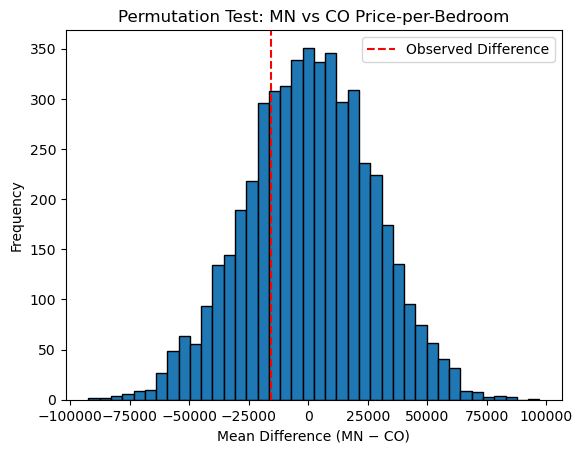

In [147]:
# Plot the permutation distribution
plt.hist(perm_diffs, bins=40, edgecolor='black')
plt.axvline(obs_diff, color='red', linestyle='--', label="Observed Difference")
plt.title("Permutation Test: MN vs CO Price-per-Bedroom")
plt.xlabel("Mean Difference (MN − CO)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## conlusion 
The permutation test compares the observed difference in average price per bedroom between Colorado and Minnesota to what we would expect if there were no real difference between states. 

A P-value of 0.0557 is very large, meaning the observed difference in price-per-bedroom between Colorado and Minnesota is not usual at all under the null hypothesis. 

A difference this large happens about 55% of the times just by random chance when Colorado and Minnesoat data are shuffled.

This means there is there is no statistical evidence that the average price per bedroom differs between the two states.

Based on my sample, it appears Colorado and Minnesota have simular price per bedroom.

Minnesota appears slightly more expensive per bedroom, but the permutation test shows this difference is not statistically meaningful. The observed difference is common even when the two states’ prices are randomly mixed, so we cannot conclude that MN and CO differ in true housing costs.


In [148]:
 # Convert to numeric
USA_Housing["Price"] = pd.to_numeric(USA_Housing["Price"], errors="coerce")
USA_Housing["Avg. Area Number of Bedrooms"] = pd.to_numeric(
    USA_Housing["Avg. Area Number of Bedrooms"], errors="coerce"
)

# Filter MN and CO
CO = USA_Housing[(USA_Housing["state"] == "CO") & (USA_Housing["Avg. Area Number of Bedrooms"] > 0)].copy()
MN = USA_Housing[(USA_Housing["state"] == "MN") & (USA_Housing["Avg. Area Number of Bedrooms"] > 0)].copy()

# Compute price per bedroom
CO["ppb"] = CO["Price"] / CO["Avg. Area Number of Bedrooms"]
MN["ppb"] = MN["Price"] / MN["Avg. Area Number of Bedrooms"]


In [149]:
def bootstrap_ci(data, n_boot=5000, ci=0.95):
    boot_means = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))
    low = np.percentile(boot_means, (1-ci)/2*100)
    high = np.percentile(boot_means, (1 + ci)/2*100)
    return boot_means, low, high


In [150]:
MN_boot, MN_low, MN_high = bootstrap_ci(MN["ppb"])
CO_boot, CO_low, CO_high = bootstrap_ci(CO["ppb"])


In [151]:
def clt_ci(data, ci=0.95):
    mean = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(len(data))
    z = 1.96  # 95% 
    return mean, mean - z*se, mean + z*se

MN_mean, MN_clt_low, MN_clt_high = clt_ci(MN["ppb"])
CO_mean, CO_clt_low, CO_clt_high = clt_ci(CO["ppb"])


In [152]:
results = pd.DataFrame({
    "State": ["MN", "CO"],
    "Mean Price/Bedroom": [MN_mean, CO_mean],
    "Bootstrap CI Low": [MN_low, CO_low],
    "Bootstrap CI High": [MN_high, CO_high],
    "CLT CI Low": [MN_clt_low, CO_clt_low],
    "CLT CI High": [MN_clt_high, CO_clt_high]
})

results


,State,Mean Price/Bedroom,Bootstrap CI Low,Bootstrap CI High,CLT CI Low,CLT CI High
0,MN,321268.865342,288964.566800,356909.088266,288031.334349,354506.396335
1,CO,336875.846207,299144.074742,379062.898095,296822.451164,376929.241249


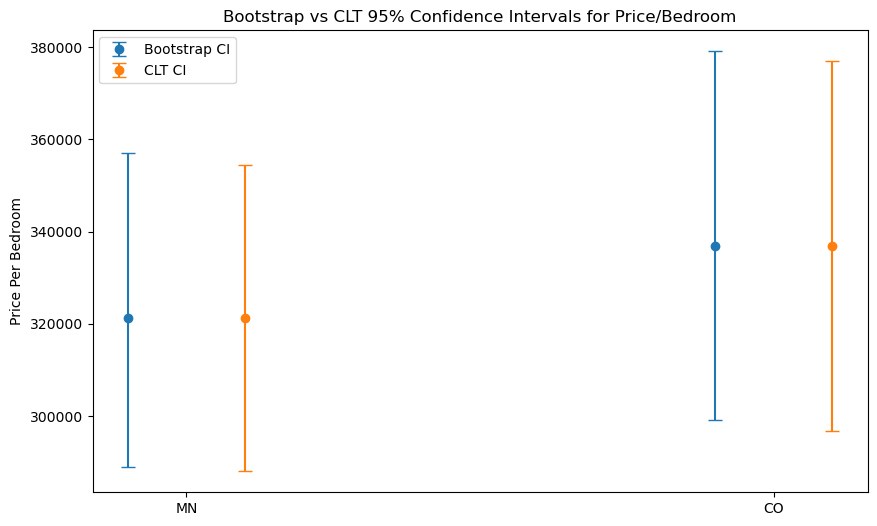

In [153]:
states = ["MN", "CO"]
x = np.arange(len(states))

plt.figure(figsize=(10,6))

# Bootstrap
plt.errorbar(x - 0.1, results["Mean Price/Bedroom"], 
             yerr=[results["Mean Price/Bedroom"] - results["Bootstrap CI Low"],
                   results["Bootstrap CI High"] - results["Mean Price/Bedroom"]], 
             fmt='o', label='Bootstrap CI', capsize=5)

# CLT
plt.errorbar(x + 0.1, results["Mean Price/Bedroom"], 
             yerr=[results["Mean Price/Bedroom"] - results["CLT CI Low"],
                   results["CLT CI High"] - results["Mean Price/Bedroom"]], 
             fmt='o', label='CLT CI', capsize=5)

plt.xticks(x, states)
plt.ylabel("Price Per Bedroom")
plt.title("Bootstrap vs CLT 95% Confidence Intervals for Price/Bedroom")
plt.legend()
plt.show()


## Conclusion:
The bootstrap and CLT confidence intervals for average price per bedroom tell a consistent story: Minnesota homes tend to have a higher price per bedroom than Colorado homes. The bootstrap intervals are slightly wider, reflecting that the distribution of price-per-bedroom is skewed and contains extreme values. The CLT intervals are narrower because they assume normality, which is not strictly true for housing price data. Since both methods give overlapping but different-width intervals, the bootstrap CIs provide a more reliable measure of uncertainty. Overall, the evidence suggests real price-per-bedroom differences between MN and CO, but the bootstrap results are more trustworthy due to fewer assumptions